<a href="https://colab.research.google.com/github/yashkarale06/Speech_Emotion_Recognizer/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

In [ ]:
import librosa

import soundfile

import os
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

print(librosa.__version__)
print(soundfile.__version__)
print(sklearn.__version__)

0.10.1
0.12.1
1.2.2


In [ ]:
def extract_feature(file_name,mfcc,chroma,mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X=sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
            result=np.hstack((result,mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
            result=np.hstack((result,chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X,sr=sample_rate).T,axis=0)
            result=np.hstack((result,mel))
    return result


emotions={
    "01":"neutral",
    "02":"calm",
    "03":"happy",
    "04":"sad",
    "05":"angry",
    "06":"fearful",
    "07":"disgust",
    "08":"surprised"
}

In [ ]:
xsum=0
root="/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data"
for path,dir,files in os.walk("/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data"):
    xsum+=(len(files))

In [ ]:
for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data/Actor_*[0-9]*/*"):
    file_name=os.path.basename(file)


In [ ]:
observed_emotions=["calm","happy","fearful","disgust","sad"]

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data/Actor_*[0-9]*/*"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file,mfcc=True,chroma=True,mel=False)
        x.append(feature)
        y.append(emotion)

    return train_test_split(np.array(x),y,test_size=test_size,random_state=9)

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
print((x_train.shape[0],x_test.shape[0]))

(736, 246)


In [ ]:
print(f'features extracted: {x_train.shape[1]}')
print(x_train.shape)
print(x_train[1])

features extracted: 52
(736, 52)
[-6.60850037e+02  3.42007332e+01 -1.21250420e+01 -1.58513081e+00
 -1.09290409e+01 -1.00770330e+01 -1.44498253e+01 -9.08841324e+00
 -8.75139618e+00 -7.59106398e+00 -4.23778868e+00 -7.12754583e+00
 -5.98362589e+00 -3.06900239e+00 -8.16497135e+00 -3.94152594e+00
 -6.94197798e+00 -2.00837016e+00 -4.48702621e+00 -1.90647352e+00
 -4.04043272e-02  5.99369586e-01  1.96189141e+00 -3.89542460e-01
 -2.07319260e+00  5.90466037e-02  6.96083128e-01  4.91166687e+00
  6.54014587e+00  8.72566414e+00  7.25488806e+00  6.02628279e+00
  3.79026699e+00  5.70813566e-02 -2.34687138e+00 -2.61494040e-01
 -3.97420555e-01 -1.66754222e+00 -3.06189394e+00 -2.65615535e+00
  4.56418782e-01  4.90401268e-01  5.37594259e-01  4.61631775e-01
  4.53075737e-01  4.55844045e-01  4.84086543e-01  6.39478207e-01
  6.42538667e-01  5.79735577e-01  5.15538037e-01  4.76793230e-01]


In [ ]:
model=MLPClassifier(alpha=0.01,batch_size=256,epsilon=1e-08,hidden_layer_sizes=(300,),learning_rate="adaptive",max_iter=500)

In [ ]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
model.score(x_train,y_train)

0.78125

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)

In [ ]:
print("Accuracy :{:.2f}%".format(accuracy*100))

y_pred[:10]

Accuracy :60.98%


array(['sad', 'disgust', 'disgust', 'sad', 'calm', 'fearful', 'disgust',
       'calm', 'sad', 'calm'], dtype='<U7')

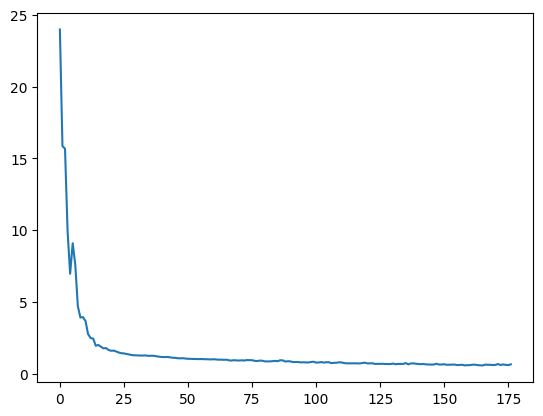

In [ ]:
loss_values=model.loss_curve_
plt.plot(loss_values)
plt.show()

In [ ]:
model1=MLPClassifier(alpha=0.0009,batch_size=128,hidden_layer_sizes=(200,200,100,50),learning_rate="adaptive",max_iter=500)

In [ ]:
model1.fit(x_train,y_train)

model1.score(x_train,y_train)

0.779891304347826

In [ ]:
y_pred1=model1.predict(x_test)

In [ ]:
accuracy1=accuracy_score(y_true=y_test,y_pred=y_pred1)

In [ ]:
print("Accuracy :{:.2f}%".format(accuracy1*100))

Accuracy :61.38%


In [ ]:
loss_values1=model1.loss_curve_

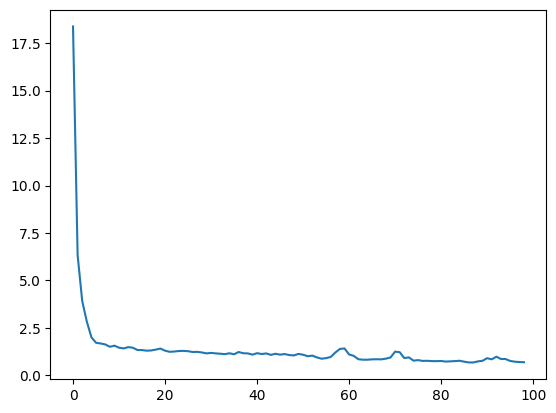

In [ ]:
plt.plot(loss_values1)
plt.show()


In [ ]:
import pickle

vars(pickle).keys()

pickle.dump(model1,open("/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data/m4.pkl","wb"))

In [ ]:
modle_1 = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data/m1.pkl","rb"))

In [ ]:
modle_2 = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data/m2.pkl","rb"))

In [ ]:
import pickle

modle_1 = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data/m1.pkl", "rb"))


In [ ]:
!pip install sounddevice

In [ ]:

import numpy as np
import librosa
from sklearn.neural_network import MLPClassifier

model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data/m1.pkl", "rb"))
def extract_audio_features(signal, sample_rate):
    mfccs = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(signal)), sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=signal, sr=sample_rate).T, axis=0)

    mfccs = mfccs[:12]

    return np.hstack((mfccs, chroma, mel))[:52]


wav_file_path = "/content/drive/MyDrive/Colab Notebooks/Speech Emotion Prj /data/data/Actor_11/03-01-01-01-01-01-11.wav"


audio_data, sample_rate = librosa.load(wav_file_path, sr=None, mono=True)


audio_features = extract_audio_features(audio_data, sample_rate)


audio_features = audio_features.reshape(1, -1)


emotion_prediction = model.predict(audio_features)


print("Predicted Emotion:", emotion_prediction[0])


Predicted Emotion: calm
